# Social Network Analysis - Class 10 - Structural Equivalence

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import networkx as nx
import igraph as ig

In [67]:
trade = pd.read_csv('Data/trade.csv')

In [33]:
trade

,ALGERIA,ARGENTINA,BRAZIL,CHINA,CZECHOSLOVAKIA,ECUADOR,EGYPT,ETHIOPIA,FINLAND,HONDURAS,...,MADAGASCAR,NEW_ZEALAND,PAKISTAN,SPAIN,SWITZERLAND,SYRIA,THAILAND,UNITED_KINGDOM,UNITED_STATES,YUGOSLAVIA
0,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,1,1,0,1,0,0,1,0,...,0,0,1,1,1,0,1,0,1,0
2,1,1,0,1,1,1,1,0,1,1,...,0,1,1,1,1,1,1,1,1,1
3,1,1,1,0,1,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,0,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0,1,1,0,...,0,0,0,1,1,0,0,1,1,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
8,1,1,1,1,1,1,1,1,0,1,...,0,1,1,1,1,1,1,1,1,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
trade.corr()

,ALGERIA,ARGENTINA,BRAZIL,CHINA,CZECHOSLOVAKIA,ECUADOR,EGYPT,ETHIOPIA,FINLAND,HONDURAS,...,MADAGASCAR,NEW_ZEALAND,PAKISTAN,SPAIN,SWITZERLAND,SYRIA,THAILAND,UNITED_KINGDOM,UNITED_STATES,YUGOSLAVIA
ALGERIA,1.000000,0.607808,0.510490,0.669342,0.496503,0.712525,0.919866,0.438187,0.496609,0.712525,...,0.531085,0.579538,0.918780,0.513610,0.496609,0.585369,0.842075,0.329630,0.434524,0.496609
ARGENTINA,0.607808,1.000000,0.409917,0.305505,0.438187,0.567367,0.676123,0.657143,0.480079,0.741941,...,0.487950,0.714286,0.542857,0.356386,0.480079,0.676123,0.654654,0.542326,0.292770,0.480079
BRAZIL,0.510490,0.409917,1.000000,0.367058,0.174825,0.669342,0.418121,0.409917,0.367058,0.669342,...,0.627646,0.438187,0.607808,0.222309,0.367058,0.585369,0.367058,0.038329,0.337963,0.367058
CHINA,0.669342,0.305505,0.367058,1.000000,0.496609,0.600000,0.602464,0.130931,0.466667,0.422222,...,0.248452,0.567367,0.741941,0.449712,0.466667,0.602464,0.644444,0.260360,0.347833,0.466667
CZECHOSLOVAKIA,0.496503,0.438187,0.174825,0.496609,1.000000,0.367058,0.585369,0.438187,0.496609,0.539792,...,0.531085,0.579538,0.409917,0.329630,0.496609,0.585369,0.496609,0.329630,0.241402,0.496609
ECUADOR,0.712525,0.567367,0.669342,0.600000,0.367058,1.000000,0.602464,0.392792,0.422222,0.822222,...,0.546594,0.480079,0.654654,0.307698,0.422222,0.602464,0.600000,0.118345,0.248452,0.422222
EGYPT,0.919866,0.676123,0.418121,0.602464,0.585369,0.602464,1.000000,0.507093,0.430331,0.774597,...,0.577350,0.676123,0.845154,0.458349,0.430331,0.666667,0.774597,0.458349,0.384900,0.602464
ETHIOPIA,0.438187,0.657143,0.409917,0.130931,0.438187,0.392792,0.507093,1.000000,0.480079,0.567367,...,0.487950,0.542857,0.371429,0.542326,0.480079,0.507093,0.480079,0.356386,0.292770,0.480079
FINLAND,0.496609,0.480079,0.367058,0.466667,0.496609,0.422222,0.430331,0.480079,1.000000,0.422222,...,0.447214,0.741941,0.567367,0.639064,0.822222,0.602464,0.644444,0.449712,0.546594,0.466667
HONDURAS,0.712525,0.741941,0.669342,0.422222,0.539792,0.822222,0.774597,0.567367,0.422222,1.000000,...,0.745356,0.654654,0.654654,0.307698,0.422222,0.774597,0.600000,0.307698,0.248452,0.600000


In [73]:
# create dictionary for country names
countrynames = {i: trade.columns[i] for i in range(len(trade.columns))}

# Need to number the countries for the adjacency matrix
trade.index = list(np.arange(1, 25))
trade.columns = list(np.arange(1, 25))

In [74]:
# create directed graph
g = nx.from_pandas_adjacency(trade, create_using=nx.DiGraph())

nx.write_edgelist(g, "Data/test.edgelist")

In [81]:
# code based on https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_blockmodel.html

from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict

def create_hc(G, t=1):
    """Creates hierarchical cluster of graph G from distance matrix"""
    path_length = nx.all_pairs_shortest_path_length(G)
    distances = np.zeros((len(G), len(G)))
    for u, p in path_length:
        for v, d in p.items():
            distances[u][v] = d
            
    # Create hierarchical cluster
    Y = distance.squareform(distances)
    Z = hierarchy.complete(Y)  # Creates HC using farthest point linkage
    
    # This partition selection is arbitrary, for illustrive purposes
    # higher t leads to lower number of clusters
    membership = list(hierarchy.fcluster(Z, t=t, criterion='distance'))
    
    # Create collection of lists for blockmodel
    partition = defaultdict(list)
    for n, p in zip(list(range(len(G))), membership):
        partition[p].append(n)
        
    return list(partition.values())

G=nx.read_edgelist("Data/test.edgelist")

# Extract largest connected component into graph H
H = next(nx.connected_component_subgraphs(G))

# Makes life easier to have consecutively labeled integer nodes
H = nx.convert_node_labels_to_integers(H)

# Create parititions with hierarchical clustering
partitions = create_hc(H, t=1)

# Build blockmodel graph
BM = nx.quotient_graph(H, partitions, relabel=True)


Based on testing of this particular dataset, setting t<1 generates as many clusters as there are vertices. Setting t>=1 and t<2 generates 9 clusters. And t >= 2 generates 1 cluster. 

In [82]:
# clusters formed for the vertices

partitions

[[0, 1, 2, 3, 4, 6, 10, 21],
 [5, 7, 12],
 [8, 13, 22],
 [9, 17],
 [11, 14, 15, 23],
 [16],
 [18],
 [19],
 [20]]

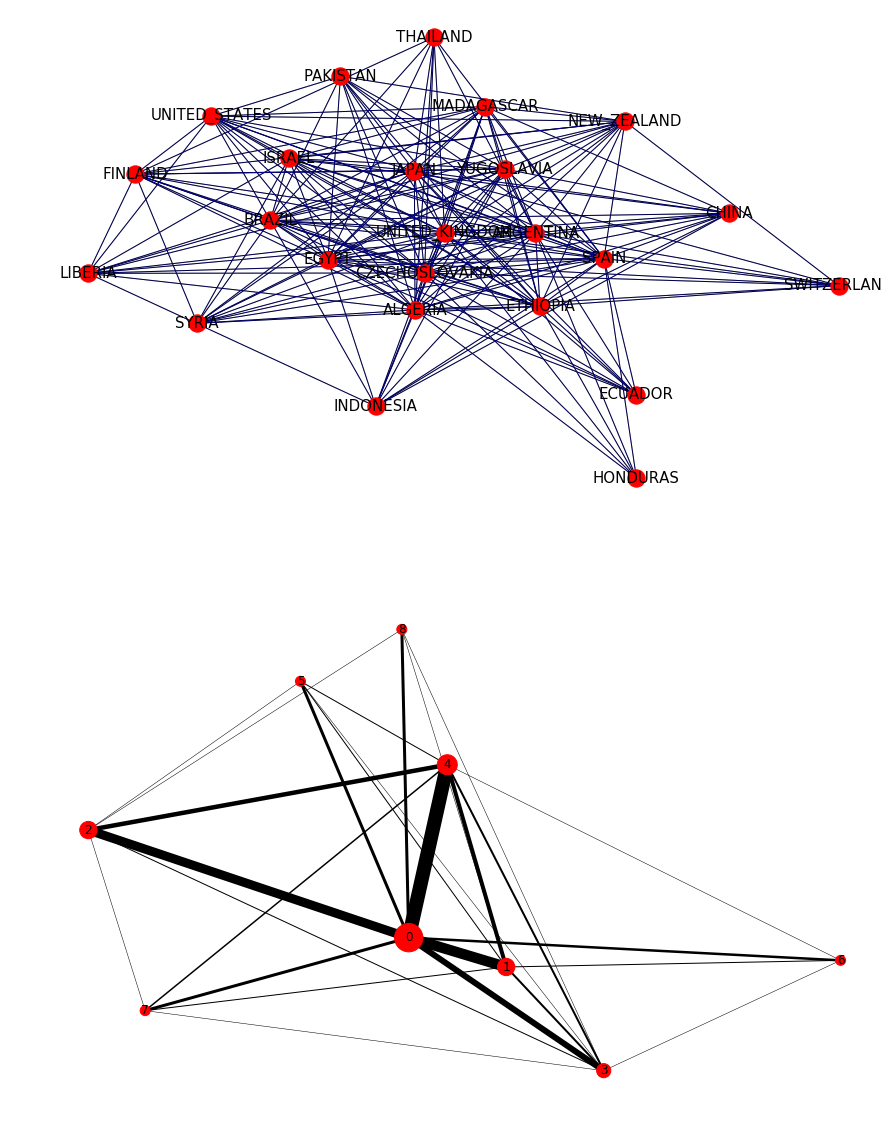

In [112]:
# code based on https://networkx.github.io/documentation/stable/auto_examples/algorithms/plot_blockmodel.html

pos = nx.spring_layout(H, iterations=100)
f = plt.figure(figsize=(15, 20))
ax = f.add_subplot(211)
nx.draw(H, pos, with_labels=False, node_size=300)
nx.draw_networkx_labels(H, pos, labels=countrynames, font_size=15)
nx.draw_networkx_edges(H, pos, width=1.0, alpha=0.3, edge_color='b')

# Draw block model with weighted edges and nodes sized by number of internal nodes
node_size = [BM.nodes[x]['nnodes'] * 100 for x in BM.nodes()]
edge_width = [(0.5 * d['weight']) for (u, v, d) in BM.edges(data=True)]

# Set positions to mean of positions of internal nodes from original graph
posBM = {}
for n in BM:
    xy = np.array([pos[u] for u in BM.nodes[n]['graph']])
    posBM[n] = xy.mean(axis=0)
    
ax2 = f.add_subplot(212)
nx.draw(BM, posBM, node_size=node_size, width=edge_width, with_labels=True)
plt.axis('off')
plt.show()